In [2]:
import pandas as pd

In [37]:
# MERGE MEASUREMENTS WITH ELEVATION
measurements = pd.read_csv("measurements-out-2903-q1q3.csv")

# elevation = pd.read_csv("elevation_all.csv")

# dropped = elevation.dropna(subset=["elevation"])

# merged = measurements.merge(elevation,how="left",left_on=["latitude","longitude"],right_on=["lat","lon"])

# merged.to_csv("measurements_with_elevation_without_outliers.csv",index=None)

In [3]:
merged

,datetime,latitude,longitude,radiation,lat,lon,elevation
0,2021-03-14,42.106730,-71.71281,0.040000,NaN,NaN,NaN
1,2021-03-14,1.809340,41.23510,0.094286,NaN,NaN,NaN
2,2021-03-14,41.259710,-73.82321,0.040000,NaN,NaN,NaN
3,2021-03-14,41.259710,-73.82321,0.037143,NaN,NaN,NaN
4,2021-03-14,41.259710,-73.82321,0.040000,NaN,NaN,NaN
...,...,...,...,...,...,...,...
135786897,2011-04-23,35.641018,139.72076,0.134286,NaN,NaN,NaN
135786898,2011-04-23,35.640965,139.72070,0.140000,35.640965,139.7207,23.0
135786899,2011-04-23,35.640970,139.72070,0.140000,NaN,NaN,NaN
135786900,2011-04-23,35.640970,139.72070,0.134286,NaN,NaN,NaN


In [3]:
########################################################

In [2]:
# REMOVE MEASUREMENTS WITHOUT ELEVATION
# merged = pd.read_csv("measurements_with_elevation_without_outliers.csv")

# mdropped = merged.dropna(subset=["elevation"])

# del mdropped["lat"]
# del mdropped["lon"]

# mdropped.reset_index(inplace=True)

# del mdropped["index"]

# mdropped.to_csv("measurements_with_elevation_without_outliers_cleaned.csv",index=None)

In [3]:
mdropped = pd.read_csv("measurements_with_elevation_without_outliers_cleaned.csv")

In [4]:
len(mdropped)

16310517

In [3]:
print(mdropped["datetime"].max())
print(mdropped[mdropped["datetime"]!="1970-01-01"]["datetime"].min())

2021-03-14
1981-10-03


In [4]:
len(~mdropped["datetime"].isna()) == len(mdropped["datetime"])

True

In [5]:
mdropped["datetime"]

0           2021-03-14
1           2021-03-14
2           2021-03-14
3           2021-03-14
4           2021-03-14
               ...    
16310512    2011-04-23
16310513    2011-04-23
16310514    2011-04-23
16310515    2011-04-23
16310516    2011-04-23
Name: datetime, Length: 16310517, dtype: object

In [6]:
mdropped[mdropped["datetime"]=="1970-01-01"]

,datetime,latitude,longitude,radiation,elevation
1555036,1970-01-01,39.4099,-77.9069,0.042857,144.0


## Analysis of correlation between radiation and elevation

### Different measurements for the same coordination treated as different samples

In [7]:
df = mdropped[["radiation","elevation"]]

In [8]:
df

,radiation,elevation
0,0.025714,23.0
1,0.117143,23.0
2,0.037143,134.0
3,0.125714,134.0
4,0.134286,13.0
...,...,...
16310512,0.111429,7.0
16310513,0.111429,6.0
16310514,0.114286,0.0
16310515,0.108571,20.0


In [9]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import pearsonr

In [10]:
print('Radiation: mean=%.3f stdv=%.3f max=%.3f min=%.3f' % (np.mean(df["radiation"]), np.std(df["radiation"]), np.max(df["radiation"]), np.min(df["radiation"])))
print('Elevation: mean=%.3f stdv=%.3f max=%.3f min=%.3f' % (np.mean(df["elevation"]), np.std(df["elevation"]), np.max(df["elevation"]), np.min(df["elevation"])))

Radiation: mean=0.085 stdv=0.040 max=0.198 min=0.005
Elevation: mean=160.690 stdv=234.804 max=4478.000 min=-413.000


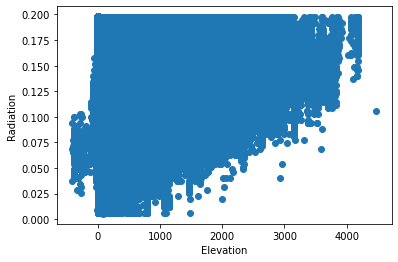

In [11]:
plt.scatter(df["elevation"],df["radiation"])
plt.xlabel("Elevation")
plt.ylabel("Radiation")
plt.show()

In [12]:
corr, _ = pearsonr(df["elevation"],df["radiation"])
print(f"Pearsons correlation: %.3f" % (corr))

Pearsons correlation: 0.157


#### Elevation below 700 m

In [13]:
below_700 = df[df["elevation"]<700]
print(f"Number of samples: {len(below_700)}")

Number of samples: 16022395


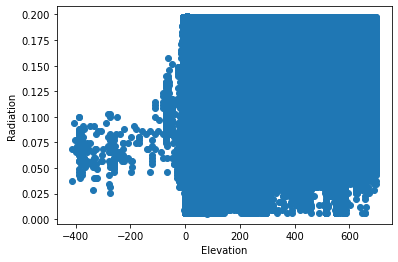

In [14]:
plt.scatter(below_700["elevation"],below_700["radiation"])
plt.xlabel("Elevation")
plt.ylabel("Radiation")
plt.show()

In [15]:
b700_corr, _ = pearsonr(below_700["elevation"],below_700["radiation"])
print(f"Pearsons correlation: %.3f" % (b700_corr))

Pearsons correlation: 0.090


#### Elevation above 700 m

In [16]:
above_700 = df[df["elevation"]>=700]
print(f"Number of samples: {len(above_700)}")

Number of samples: 288122


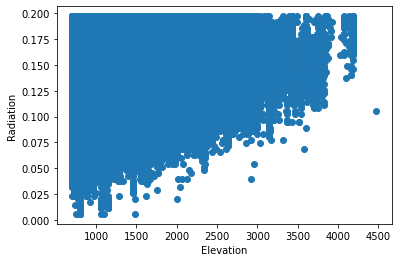

In [17]:
plt.scatter(above_700["elevation"],above_700["radiation"])
plt.xlabel("Elevation")
plt.ylabel("Radiation")
plt.show()

In [18]:
a700_corr, _ = pearsonr(above_700["elevation"],above_700["radiation"])
print(f"Pearsons correlation: %.3f" % (a700_corr))

Pearsons correlation: 0.363


#### Northern hemisphere

In [19]:
nh = mdropped[mdropped["latitude"]>0][["elevation","radiation"]]
print(f"Number of samples: {len(nh)}")

Number of samples: 16175529


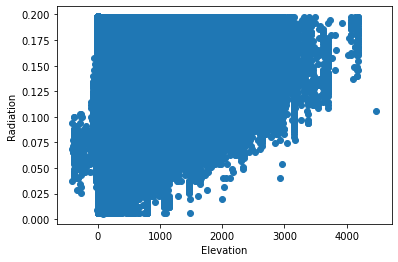

In [20]:
plt.scatter(nh["elevation"],nh["radiation"])
plt.xlabel("Elevation")
plt.ylabel("Radiation")
plt.show()

In [21]:
nh_corr, _ = pearsonr(nh["elevation"],nh["radiation"])
print(f"Pearsons correlation: %.3f" % (nh_corr))

Pearsons correlation: 0.150


#### Southern hemisphere

In [22]:
sh = mdropped[mdropped["latitude"]<0][["elevation","radiation"]]
print(f"Number of samples: {len(sh)}")

Number of samples: 134988


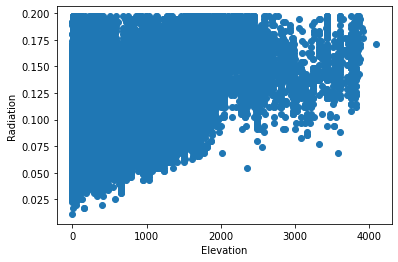

In [23]:
plt.scatter(sh["elevation"],sh["radiation"])
plt.xlabel("Elevation")
plt.ylabel("Radiation")
plt.show()

In [24]:
sh_corr, _ = pearsonr(sh["elevation"],sh["radiation"])
print(f"Pearsons correlation: %.3f" % (sh_corr))

Pearsons correlation: 0.505


### Taking mean values of measurements for the same coordinations

In [25]:
df_mean = mdropped.groupby(by=["latitude","longitude"]).mean()

In [26]:
df_mean.reset_index(inplace=True)

In [27]:
df_mean

,latitude,longitude,radiation,elevation
0,-47.023970,-72.818210,0.102857,327.0
1,-47.023380,-72.817070,0.097143,338.0
2,-47.020070,-72.822130,0.125714,274.0
3,-47.018810,-72.805660,0.102857,402.0
4,-47.018005,-72.823530,0.097143,270.0
...,...,...,...,...
1464612,60.389050,11.215355,0.145714,196.0
1464613,60.389805,18.162700,0.125714,12.0
1464614,60.390385,17.476435,0.131429,63.0
1464615,60.390625,18.163130,0.105714,20.0


In [28]:
print(f"Number of samples: {len(df_mean)}")

Number of samples: 1464617


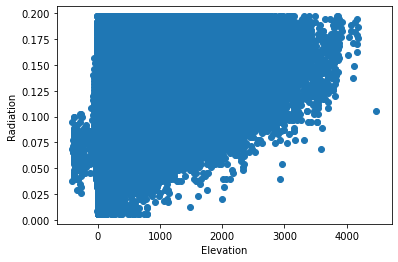

In [29]:
plt.scatter(df_mean["elevation"],df_mean["radiation"])
plt.xlabel("Elevation")
plt.ylabel("Radiation")
plt.show()

In [30]:
m_corr, _ = pearsonr(df_mean["elevation"],df_mean["radiation"])
print(f"Pearsons correlation: %.3f" % (m_corr))

Pearsons correlation: 0.265


### Taking median values of measurements for the same coordinations

In [31]:
df_median = mdropped.groupby(by=["latitude","longitude"]).median()
df_median.reset_index(inplace=True)

In [32]:
print(f"Number of samples: {len(df_median)}")

Number of samples: 1464617


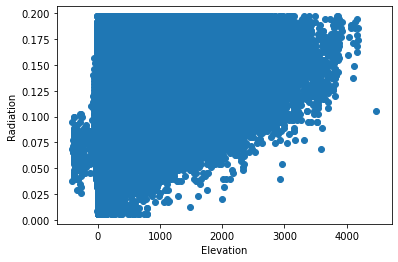

In [33]:
plt.scatter(df_median["elevation"],df_median["radiation"])
plt.xlabel("Elevation")
plt.ylabel("Radiation")
plt.show()

In [34]:
median_corr, _ = pearsonr(df_median["elevation"],df_median["radiation"])
print(f"Pearsons correlation: %.3f" % (median_corr))

Pearsons correlation: 0.264


Number of samples: 1413600


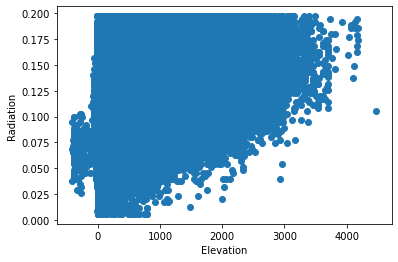

Pearsons correlation: 0.252


In [35]:
nhm = df_median[df_median["latitude"]>0][["elevation","radiation"]]
print(f"Number of samples: {len(nhm)}")

plt.scatter(nhm["elevation"],nhm["radiation"])
plt.xlabel("Elevation")
plt.ylabel("Radiation")
plt.show()

nhm_corr, _ = pearsonr(nhm["elevation"],nhm["radiation"])
print(f"Pearsons correlation: %.3f" % (nhm_corr))

Number of samples: 51017


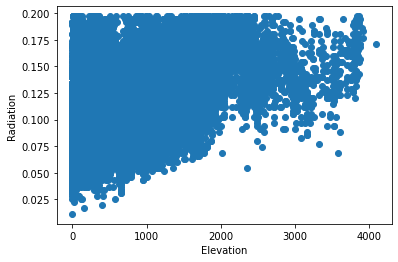

Pearsons correlation: 0.481


In [36]:
shm = df_median[df_median["latitude"]<0][["elevation","radiation"]]
print(f"Number of samples: {len(shm)}")

plt.scatter(shm["elevation"],shm["radiation"])
plt.xlabel("Elevation")
plt.ylabel("Radiation")
plt.show()

shm_corr, _ = pearsonr(shm["elevation"],shm["radiation"])
print(f"Pearsons correlation: %.3f" % (shm_corr))